In [222]:
import pickle as pkl
import numpy as np

In [223]:
with open("../results_tmgl/results_10_percent.pkl", "rb") as f:
    results_10 = pkl.load(f)
with open("../results_tmgl/thetas_10_percent.pkl", "rb") as f:
    thetas_10 = pkl.load(f)

with open("../results_tmgl/results_5_percent.pkl", "rb") as f:
    results_5 = pkl.load(f)
with open("../results_tmgl/thetas_5_percent.pkl", "rb") as f:
    thetas_5 = pkl.load(f)

with open("../results_tmgl/results_5111_percent.pkl", "rb") as f:
    results_51 = pkl.load(f)
with open("../results_tmgl/results_5111_percent.pkl", "rb") as f:
    thetas_51 = pkl.load(f)

In [224]:
with open("../results_tmgl/results_20_percent.pkl", "rb") as f:
    results_20 = pkl.load(f)
with open("../results_tmgl/thetas_20_percent.pkl", "rb") as f:
    thetas_20 = pkl.load(f)

In [225]:
import matplotlib.pyplot as plt

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


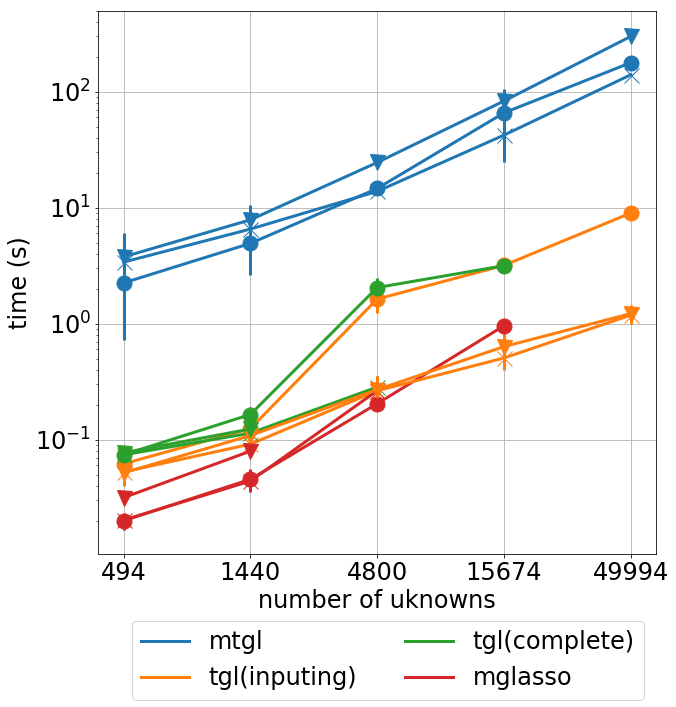

In [217]:
import pandas as pd
from regain.utils import flatten
from matplotlib import rcParams
rcParams.update({'font.size':24})

['o', 'x', 'v']
plt.figure(figsize=(10,10))
labels = ['mtgl', 'tgl(inputing)',  'tgl(complete)','mglasso']
for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_5:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_5[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_5[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='o', lw=3, markersize=15, color='C'+str(i))

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_10[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_10[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='x', lw=3,markersize=15, color='C'+str(i))

plt.yscale('log')

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_20[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_20[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='v',lw=3, markersize=15, color='C'+str(i))

plt.yscale('log')
plt.grid()
plt.xticks(np.arange(5), np.array(unknowns)*2)

legend_elements = [  Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='tgl(inputing)'),
                
                   Line2D([0], [0], color='C2', lw=3, label='tgl(complete)'),
                      Line2D([0], [0], color='C3', lw=3, label='mglasso'),
#                    Line2D([0], [0], marker=markers[0], color='k', label='5%',
#                           markerfacecolor='k', markersize=15),
#                     Line2D([0], [0], marker=markers[1], color='k', label='10%',
#                           markerfacecolor='k', markersize=15),
#                    Line2D([0], [0], marker=markers[2], color='k', label='20%',
#                           markerfacecolor='k', markersize=15)
                 ]
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.1), ncol=2, fontsize=24)

#                    Line2D([0], [0], color='C0', lw=1, label='mtgl'),
#                    Line2D([0], [0], color='C1', lw=1, label='tgl(inputing)'),
#                    Line2D([0], [0], color='C2', lw=1, label='mglasso'),
#                    Line2D([0], [0], color='C3', lw=1, label='tgl(complete)')]
    #plt.xscale('log')
#     plt.plot(df, hue='method', x='n_unknowns', y='time', marker='o')
# g.set_yscale("log");
# plt.grid()
plt.xlabel('number of uknowns')
plt.ylabel('time (s)')
# g.set_xscale("log");
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/scalability.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

In [226]:
from regain.utils import mean_structure_error

def get_mcc(results, thetas):
    mat_results = np.zeros((5, 4))
    for i, t in enumerate(thetas):
        _,d, _ = t[0].shape
       # print(results[('mgl', d)])
        a1 = float(mean_structure_error(t, [np.array(r) for r in results[('mtgl', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 0] = a1
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('tgl(inputing)', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 1] = a2
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('tgl(complete)', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 2] = a2

        a3 = float(mean_structure_error(t, [np.array(r) for r in results[('mglasso', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 3] = a3
    return mat_results


mcc_5 = get_mcc(results_5, thetas_5)

mcc_10 = get_mcc(results_10, thetas_10)

mcc_20 = get_mcc(results_20, thetas_20)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [228]:
from regain.utils import mean_structure_error

def get_std(results, thetas):
    mat_results = np.zeros((5, 4))
    for i, t in enumerate(thetas):
        _,d, _ = t[0].shape
       # print(results[('mgl', d)])
        a1 = float(mean_structure_error(t, [np.array(r) for r in results[('mtgl', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 0] = a1
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('tgl(inputing)', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 1] = a2
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('tgl(complete)', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 2] = a2

        a3 = float(mean_structure_error(t, [np.array(r) for r in results[('mglasso', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 3] = a3
    return mat_results


std_5 = get_std(results_5, thetas_5)

std_10 = get_std(results_10, thetas_10)

std_20 = get_std(results_20, thetas_20)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [244]:
# Mean and std by percentages 

mcc_51 = np.nan_to_num(mcc_5)
mcc_101 = np.nan_to_num(mcc_10)
mcc_201 = np.nan_to_num(mcc_20)



std_51 = np.nan_to_num(std_5)
std_101 = np.nan_to_num(std_10)
std_201 = np.nan_to_num(std_20)


mcc_total = np.array([mcc_51, mcc_101, mcc_201])
std_total = np.array([std_51, std_101, std_201])
print(mcc_total.shape, std_total.shape)

(3, 5, 4) (3, 5, 4)


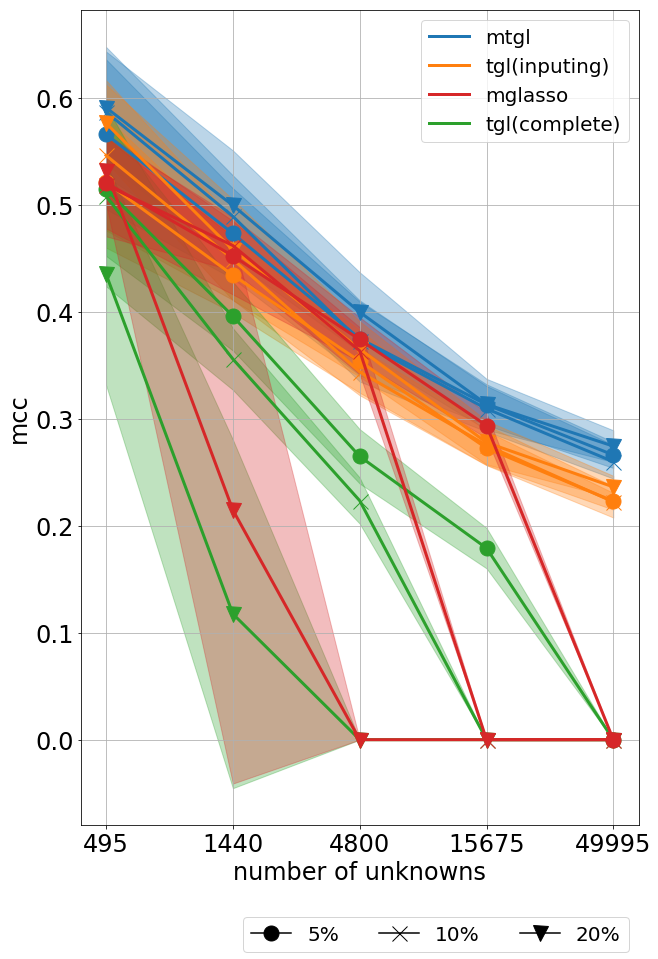

In [238]:
labels = ['mtgl', 'tgl(inputing)',  'tgl(complete)','mglasso',]
rcParams.update({'font.size':24})
plt.figure(figsize=(10,15))
for i, l in enumerate(labels):
    plt.plot(mcc_51[:,i], marker='o', color='C'+str(i), lw=3,markersize=15, label=l+'-5%')
    plt.fill_between(np.arange(5), mcc_51[:,i]-std_51[:,i], mcc_51[:,i]+std_51[:,i], color='C'+str(i),alpha=0.3)
    plt.plot(mcc_101[:,i], marker='x', color='C'+str(i), lw=3,markersize=15,label=l+'-10%')
    plt.fill_between(np.arange(5), mcc_101[:,i]-std_101[:,i], mcc_101[:,i]+std_101[:,i], color='C'+str(i),alpha=0.3)
    plt.plot(mcc_201[:,i], marker='v', color='C'+str(i), lw=3,markersize=15,label=l+'-20%')
    plt.fill_between(np.arange(5), mcc_201[:,i]-std_201[:,i], mcc_201[:,i]+std_201[:,i], color='C'+str(i),alpha=0.3)
plt.xticks(np.arange(5), [495,  1440,  4800, 15675, 49995])
plt.xlabel('number of unknowns')
plt.ylabel('mcc')
legend_elements = [ Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='tgl(inputing)'),
                   Line2D([0], [0], color='C3', lw=3, label='mglasso'),
                   Line2D([0], [0], color='C2', lw=3, label='tgl(complete)')]
legend1 = plt.legend(handles=legend_elements, ncol=1, loc=0, fontsize=20)
legend_elements = [ 
                   Line2D([0], [0], marker=markers[0], color='k', label='5%',
                          markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker=markers[1], color='k', label='10%',
                          markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker=markers[2], color='k', label='20%',
                          markerfacecolor='k', markersize=15)
                 ]
#                    Line2D([0], [0], color='C0', lw=1, label='mtgl'),
#                    Line2D([0], [0], color='C1', lw=1, label='tgl(inputing)'),
#                    Line2D([0], [0], color='C2', lw=1, label='mglasso'),
#                    Line2D([0], [0], color='C3', lw=1, label='tgl(complete)')]

plt.gca().add_artist(legend1)
# Create the figure
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.1), ncol=4, fontsize=20)
plt.grid()
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/all_mcc.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

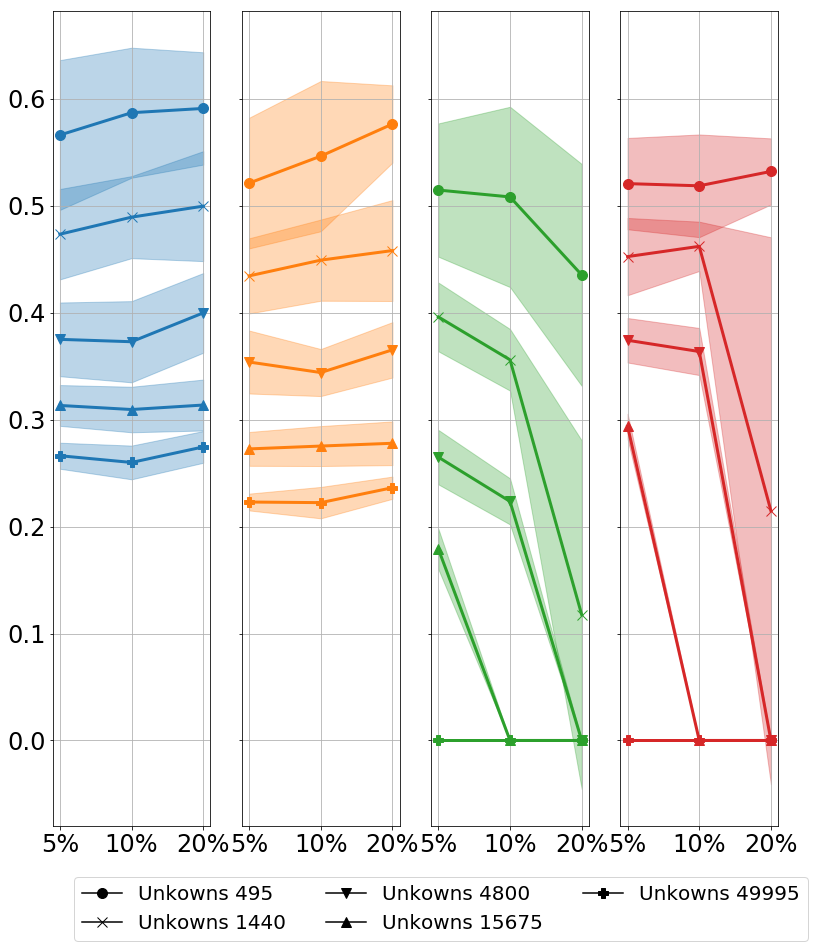

In [246]:


from matplotlib.patches import Patch
from matplotlib.lines import Line2D
labels = ['mtgl', 'tgl(inputing)', 'tgl(complete)', 'mglasso', ]
n_unkowns = [495,  1440,  4800, 15675, 49995]
markers= ['o', 'x', 'v', '^', 'P']
rcParams.update({'font.size':24})
fig, ax = plt.subplots(1,4, figsize=(13,15), sharex=True, sharey=True)
for i, l in enumerate(labels):
    for j in range(5):
        ax[i].plot(mcc_total[:,j,i], color='C'+str(i), lw=3, markersize=10, marker=markers[j], label='Unkowns '+str(n_unkowns[j]))
        ax[i].fill_between(np.arange(3), mcc_total[:,j,i] - std_total[:,j,i],
                          mcc_total[:,j,i] + std_total[:,j,i],
                          color='C'+str(i), alpha=0.3)
    #  ax[i].legend(ncol=2)
    ax[i].set_xticks(np.arange(3))
    ax[i].set_xticklabels(['5%', '10%', '20%']) 
    ax[i].grid()

legend_elements = [ 
                   
                    Line2D([0], [0], marker=markers[0], color='k', label='Unkowns '+str(n_unkowns[0]),
                          markerfacecolor='k', markersize=10),
                    Line2D([0], [0], marker=markers[1], color='k', label='Unkowns '+str(n_unkowns[1]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[2], color='k', label='Unkowns '+str(n_unkowns[2]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[3], color='k', label='Unkowns '+str(n_unkowns[3]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[4], color='k', label='Unkowns '+str(n_unkowns[4]),
                          markerfacecolor='k', markersize=10)
                  ]
# Create the figure
ax[0].legend(handles=legend_elements, bbox_to_anchor=(4.85, -0.05), ncol=3, fontsize=20)
#ax[0].set_xlabel('mcc')
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/andamento_percentages.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

# JGL

In [247]:
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/results_5_percent_partial_JGL.pkl", "rb") as f:
    results_5 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_5_percent_partial_JGL.pkl", "rb") as f:
    thetas_5 = pkl.load(f)

with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/results_10_percent_partial_JGL.pkl", "rb") as f:
    results_10 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_10_percent_partial_JGL.pkl", "rb") as f:
    thetas_10 = pkl.load(f)
    
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/results_20_percent_partial_JGL.pkl", "rb") as f:
    results_20 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_20_percent_partial_JGL.pkl", "rb") as f:
    thetas_20 = pkl.load(f)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


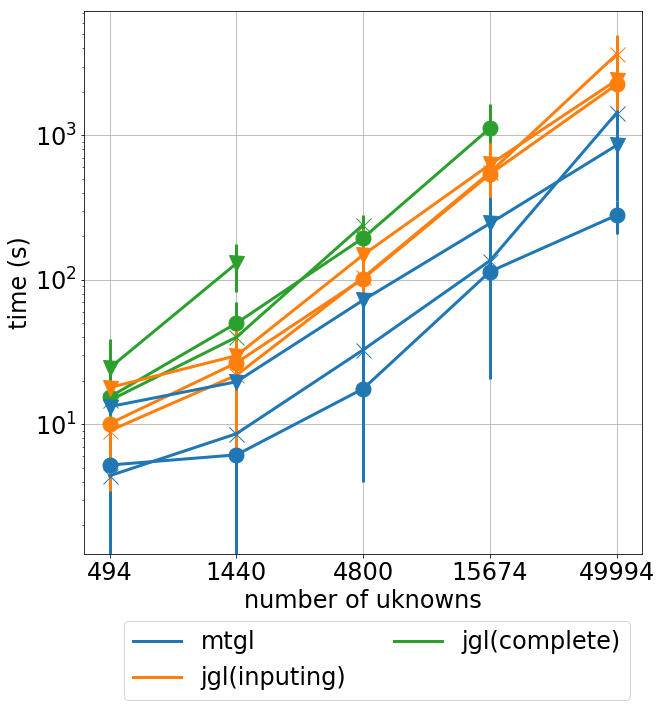

In [221]:
import pandas as pd
from regain.utils import flatten
from matplotlib import rcParams
rcParams.update({'font.size':24})

['o', 'x', 'v']
plt.figure(figsize=(10,10))
labels = ['mtgl', 'jgl(inputing)',  'jgl(complete)']
for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_5:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_5[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_5[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='o', lw=3, markersize=15, color='C'+str(i))

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_10[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_10[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='x', lw=3,markersize=15, color='C'+str(i))

plt.yscale('log')

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_20[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_20[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='v',lw=3, markersize=15, color='C'+str(i))

plt.yscale('log')
plt.grid()
plt.xticks(np.arange(5), np.array(unknowns)*2)

legend_elements = [  Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='jgl(inputing)'),
                
                   Line2D([0], [0], color='C2', lw=3, label='jgl(complete)'),
          #            Line2D([0], [0], color='C3', lw=3, label='mglasso'),
#                    Line2D([0], [0], marker=markers[0], color='k', label='5%',
#                           markerfacecolor='k', markersize=15),
#                     Line2D([0], [0], marker=markers[1], color='k', label='10%',
#                           markerfacecolor='k', markersize=15),
#                    Line2D([0], [0], marker=markers[2], color='k', label='20%',
#                           markerfacecolor='k', markersize=15)
                 ]
plt.xlabel('number of uknowns')
plt.ylabel('time (s)')
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.1), ncol=2, fontsize=24)
#                    Line2D([0], [0], color='C0', lw=1, label='mtgl'),
#                    Line2D([0], [0], color='C1', lw=1, label='tgl(inputing)'),
#                    Line2D([0], [0], color='C2', lw=1, label='mglasso'),
#                    Line2D([0], [0], color='C3', lw=1, label='tgl(complete)')]
    #plt.xscale('log')
#     plt.plot(df, hue='method', x='n_unknowns', y='time', marker='o')
# g.set_yscale("log");
# plt.grid()

# g.set_xscale("log");
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/scalability_JGL.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

In [248]:
from regain.utils import mean_structure_error

def get_mcc(results, thetas):
    mat_results = np.zeros((5, 4))
    for i, t in enumerate(thetas):
        _,d, _ = t[0].shape
       # print(results[('mgl', d)])
        a1 = float(mean_structure_error(t, [np.array(r) for r in results[('mtgl', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 0] = a1
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('jgl(inputing)', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 1] = a2
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('jgl(complete)', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 2] = a2
    return mat_results


mcc_5 = get_mcc(results_5, thetas_5)

mcc_10 = get_mcc(results_10, thetas_10)

mcc_20 = get_mcc(results_20, thetas_20)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [254]:
from regain.utils import mean_structure_error

def get_std(results, thetas):
    mat_results = np.zeros((5, 4))
    for i, t in enumerate(thetas):
        _,d, _ = t[0].shape
       # print(results[('mgl', d)])
        a1 = float(mean_structure_error(t, [np.array(r) for r in results[('mtgl', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 0] = a1
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('jgl(inputing)', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 1] = a2
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('jgl(complete)', d)]['res']], multiple=True)['mcc'].split('+/-')[1])
        mat_results[i, 2] = a2
    return mat_results


std_5 = get_std(results_5, thetas_5)

std_10 = get_std(results_10, thetas_10)

std_20 = get_std(results_20, thetas_20)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [255]:
mcc_51 = np.nan_to_num(mcc_5)
mcc_101 = np.nan_to_num(mcc_10)
mcc_201 = np.nan_to_num(mcc_20)


std_51 = np.nan_to_num(std_5)
std_101 = np.nan_to_num(std_10)
std_201 = np.nan_to_num(std_20)


mcc_total = np.array([mcc_51, mcc_101, mcc_201])
std_total = np.array([std_51, std_101, std_201])

mean_perc = np.mean(mcc_total, axis=0)
std_perc = np.std(mcc_total, axis=0)


In [256]:
std_total

array([[[0.09482096, 0.13477843, 0.10320766, 0.        ],
        [0.12600249, 0.08637351, 0.08661022, 0.        ],
        [0.05883232, 0.0424251 , 0.04688854, 0.        ],
        [0.09318765, 0.02990335, 0.08646107, 0.        ],
        [0.15900295, 0.05172045, 0.        , 0.        ]],

       [[0.10813307, 0.13437239, 0.11348435, 0.        ],
        [0.09673303, 0.08172993, 0.06366029, 0.        ],
        [0.06539786, 0.0418754 , 0.11865496, 0.        ],
        [0.13782242, 0.03793464, 0.        , 0.        ],
        [0.19184116, 0.02489938, 0.        , 0.        ]],

       [[0.19043024, 0.18810335, 0.10957703, 0.        ],
        [0.09732629, 0.07190965, 0.02887348, 0.        ],
        [0.06321496, 0.06303724, 0.        , 0.        ],
        [0.10330704, 0.04714591, 0.        , 0.        ],
        [0.16174315, 0.03037348, 0.        , 0.        ]]])

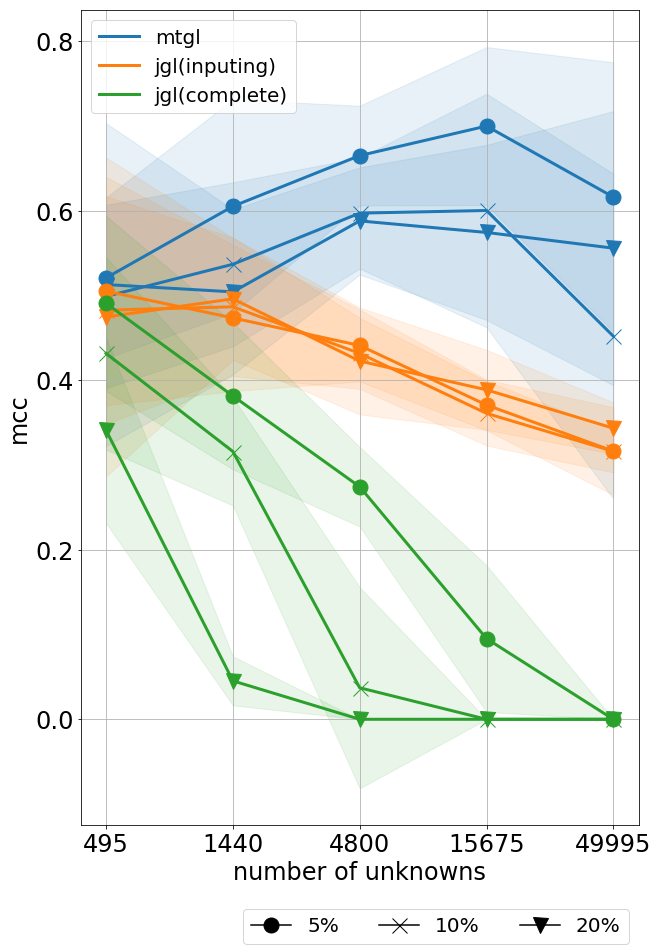

In [260]:
import matplotlib.pyplot as plt
rcParams.update({'font.size':24})
plt.figure(figsize=(10,15))
labels = ['mtgl', 'jgl(inputing)', 'jgl(complete)']
for i, l in enumerate(labels):
    plt.plot(mcc_51[:,i], marker='o', color='C'+str(i), lw=3,markersize=15, label=l+'-5%')
    plt.fill_between(np.arange(5), mcc_51[:,i]-std_51[:,i], mcc_51[:,i]+std_51[:,i],
                     color='C'+str(i),alpha=0.1)
    plt.plot(mcc_101[:,i], marker='x', color='C'+str(i), lw=3,markersize=15,label=l+'-10%')
    plt.fill_between(np.arange(5), mcc_101[:,i]-std_101[:,i], mcc_101[:,i]+std_101[:,i],
                     color='C'+str(i),alpha=0.1)
    plt.plot(mcc_201[:,i], marker='v', color='C'+str(i), lw=3,markersize=15,label=l+'-20%')
    plt.fill_between(np.arange(5), mcc_201[:,i]-std_201[:,i], mcc_201[:,i]+std_201[:,i],
                     color='C'+str(i),alpha=0.1)
plt.xticks(np.arange(5), [495,  1440,  4800, 15675, 49995])
plt.xlabel('number of unknowns')
plt.ylabel('mcc')
legend_elements = [Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='jgl(inputing)'),
                   Line2D([0], [0], color='C2', lw=3, label='jgl(complete)')]
legend1 = plt.legend(handles=legend_elements, ncol=1, loc=2, fontsize=20)
legend_elements = [Line2D([0], [0], marker=markers[0], color='k', label='5%',
                          markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker=markers[1], color='k', label='10%',
                          markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker=markers[2], color='k', label='20%',
                          markerfacecolor='k', markersize=15)
#                    Line2D([0], [0], marker=markers[3], color='k', label='Unkowns '+str(n_unkowns[3]),
#                           markerfacecolor='k', markersize=10),
#                    Line2D([0], [0], marker=markers[4], color='k', label='Unkowns '+str(n_unkowns[4]),
#                           markerfacecolor='k', markersize=10),
                   ]

# Create the figure
plt.grid()
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.09), ncol=3, fontsize=20)
plt.gca().add_artist(legend1)

plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/all_mcc_JGL.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

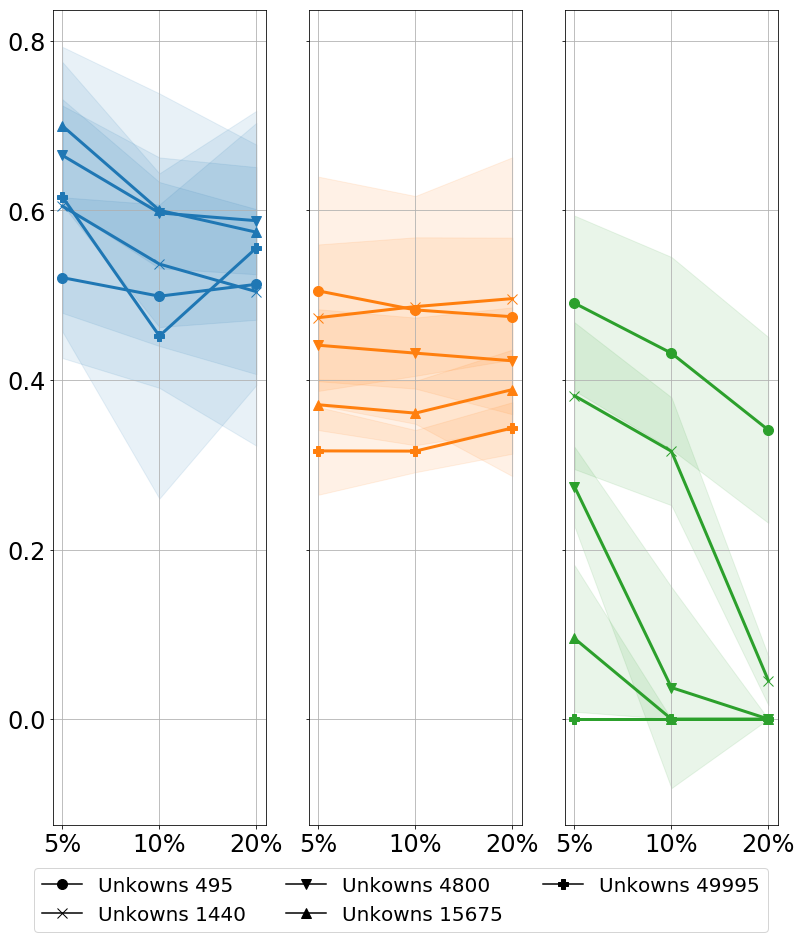

In [261]:


from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import rcParams

rcParams.update({'font.size':24})
labels = ['mtgl', 'jgl(inputing)', 'jgl(complete)']
n_unkowns = [495,  1440,  4800, 15675, 49995]
markers= ['o', 'x', 'v', '^', 'P']
fig, ax = plt.subplots(1,3, figsize=(13,15), sharex=True, sharey=True)
for i, l in enumerate(labels):
    for j in range(5):
        ax[i].plot(mcc_total[:,j,i], color='C'+str(i), lw=3, markersize=10, marker=markers[j], label='Unkowns '+str(n_unkowns[j]))
        ax[i].fill_between(np.arange(3), mcc_total[:,j,i] - std_total[:,j,i],
                          mcc_total[:,j,i] + std_total[:,j,i],
                          color='C'+str(i), alpha=0.1)
      #  ax[i].legend(ncol=2)
    ax[i].set_xticks(np.arange(3))
    ax[i].set_xticklabels(['5%', '10%', '20%']) 
    ax[i].grid()
legend_elements = [ 
                   
                    Line2D([0], [0], marker=markers[0], color='k', label='Unkowns '+str(n_unkowns[0]),
                          markerfacecolor='k', markersize=10),
                    Line2D([0], [0], marker=markers[1], color='k', label='Unkowns '+str(n_unkowns[1]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[2], color='k', label='Unkowns '+str(n_unkowns[2]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[3], color='k', label='Unkowns '+str(n_unkowns[3]),
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker=markers[4], color='k', label='Unkowns '+str(n_unkowns[4]),
                          markerfacecolor='k', markersize=10)
                  ]
# Create the figure
   
ax[0].legend(handles=legend_elements, bbox_to_anchor=(3.4, -0.04), ncol=3, fontsize=20)
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl//andamento_percentages_JGL.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()

# Latent

In [167]:
with open("../results_tmgl/results_5_percent_latent.pkl", "rb") as f:
    results_5 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_5_percent_latent.pkl", "rb") as f:
    thetas_5 = pkl.load(f)

with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/results_75_percent_latent.pkl", "rb") as f:
    results_10 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_75_percent_latent.pkl", "rb") as f:
    thetas_10 = pkl.load(f)
    
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/results_10_percent_latent.pkl", "rb") as f:
    results_20 = pkl.load(f)
with open("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/thetas_10_percent_latent.pkl", "rb") as f:
    thetas_20 = pkl.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../results_tmgl/results_5_percent_latent.pkl'

In [ ]:
import pandas as pd
from regain.utils import flatten
from matplotlib import rcParams
rcParams.update({'font.size':24})

['o', 'x', 'v']
plt.figure(figsize=(10,10))
labels = ['mtgl', 'jgl(inputing)',  'jgl(complete)']
for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_5:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_5[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_5[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='o', lw=3, markersize=15, color='C'+str(i))

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_10[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_10[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='x', lw=3,markersize=15, color='C'+str(i))

plt.yscale('log')

for i, l in enumerate(labels):
    elapsed_time_mean = []
    elapsed_time_std = []
    unknowns = []
    for k in results_10:
        if k[0] == l:
            elapsed_time_mean.append(np.mean(results_20[k]['elapsed_time']))
            
            elapsed_time_std.append(np.std(results_20[k]['elapsed_time']))
            unknowns.append(5*int(k[1] * k[1]-1) // 2 * 1)
    plt.errorbar(np.arange(5), elapsed_time_mean, yerr=elapsed_time_std, marker='v',lw=3, markersize=15, color='C'+str(i))

plt.yscale('log')
plt.grid()
plt.xticks(np.arange(5), np.array(unknowns)*2)

legend_elements = [  Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='jgl(inputing)'),
                
                   Line2D([0], [0], color='C2', lw=3, label='jgl(complete)'),
          #            Line2D([0], [0], color='C3', lw=3, label='mglasso'),
#                    Line2D([0], [0], marker=markers[0], color='k', label='5%',
#                           markerfacecolor='k', markersize=15),
#                     Line2D([0], [0], marker=markers[1], color='k', label='10%',
#                           markerfacecolor='k', markersize=15),
#                    Line2D([0], [0], marker=markers[2], color='k', label='20%',
#                           markerfacecolor='k', markersize=15)
                 ]
plt.xlabel('number of uknowns')
plt.ylabel('time (s)')
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.1), ncol=2, fontsize=24)
#                    Line2D([0], [0], color='C0', lw=1, label='mtgl'),
#                    Line2D([0], [0], color='C1', lw=1, label='tgl(inputing)'),
#                    Line2D([0], [0], color='C2', lw=1, label='mglasso'),
#                    Line2D([0], [0], color='C3', lw=1, label='tgl(complete)')]
    #plt.xscale('log')
#     plt.plot(df, hue='method', x='n_unknowns', y='time', marker='o')
# g.set_yscale("log");
# plt.grid()
plt.show()
# g.set_xscale("log");
plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/scalability_JGL.pdf", dpi=200, bbox_inches='tight',
           transparent=True)

In [166]:
results_10[('lvglasso', 10)]['res'], thetas_5[0][0].shape

([], (10, 10, 10))

In [161]:
from regain.utils import mean_structure_error

def get_mcc(results, thetas, perc):
    mat_results = np.zeros((5, 4))
    for i, t in enumerate(thetas):
        _,d, _ = t[0].shape
        n_dim_lat = int(perc*d)
       # print(results[('mgl', d)])
        a1 = float(mean_structure_error(t, [np.array([r_[n_dim_lat:, n_dim_lat:]for r_ in r]) for r in results[('mtgl', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 0] = a1
        a2 = float(mean_structure_error(t, [np.array(r) for r in results[('ltgl', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 1] = a2
        a2 = float(mean_structure_error(t, [np.array(r[n_dim_lat:, n_dim_lat:]) for r in results[('lvglasso', d)]['res']], multiple=True)['mcc'].split('+/-')[0])
        mat_results[i, 2] = a2
    return mat_results


mcc_5 = get_mcc(results_5, thetas_5, 0.05)

mcc_10 = get_mcc(results_10, thetas_10, 0.075)

mcc_20 = get_mcc(results_20, thetas_20, 0.1)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Incompatible vector size. It must be a binomial coefficient n choose 2 for some integer n >= 2.

In [144]:
mcc_51 = np.nan_to_num(mcc_5)
mcc_101 = np.nan_to_num(mcc_10)
mcc_201 = np.nan_to_num(mcc_20)

mcc_total = np.array([mcc_51, mcc_101, mcc_201])
mean_perc = np.mean(mcc_total, axis=0)
std_perc = np.std(mcc_total, axis=0)


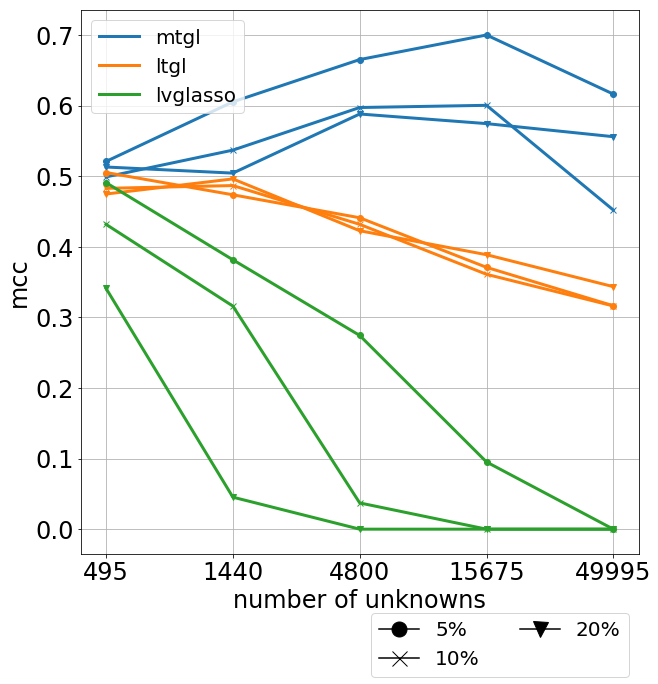

In [145]:
import matplotlib.pyplot as plt
rcParams.update({'font.size':24})
plt.figure(figsize=(10,10))
labels = ['mtgl', 'ltgl', 'lvglasso']
for i, l in enumerate(labels):
    plt.plot(mcc_51[:,i], marker='o', color='C'+str(i), lw=3, label=l+'-5%')
    plt.plot(mcc_101[:,i], marker='x', color='C'+str(i), lw=3, label=l+'-10%')
    plt.plot(mcc_201[:,i], marker='v', color='C'+str(i), lw=3, label=l+'-20%')
plt.xticks(np.arange(5), [495,  1440,  4800, 15675, 49995])
plt.xlabel('number of unknowns')
plt.ylabel('mcc')
legend_elements = [Line2D([0], [0], color='C0', lw=3, label='mtgl'),
                   Line2D([0], [0], color='C1', lw=3, label='ltgl'),
                   Line2D([0], [0], color='C2', lw=3, label='lvglasso')]
legend1 = plt.legend(handles=legend_elements, ncol=1, loc=2, fontsize=20)
legend_elements = [Line2D([0], [0], marker=markers[0], color='k', label='5%',
                          markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker=markers[1], color='k', label='10%',
                          markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker=markers[2], color='k', label='20%',
                          markerfacecolor='k', markersize=15)
#                    Line2D([0], [0], marker=markers[3], color='k', label='Unkowns '+str(n_unkowns[3]),
#                           markerfacecolor='k', markersize=10),
#                    Line2D([0], [0], marker=markers[4], color='k', label='Unkowns '+str(n_unkowns[4]),
#                           markerfacecolor='k', markersize=10),
                   ]

# Create the figure
plt.grid()
plt.legend(handles=legend_elements, bbox_to_anchor=(1, -0.09), ncol=2, fontsize=20)
plt.gca().add_artist(legend1)

plt.savefig("/home/vero/Dropbox (DIBRIS)/PhD/papers/_inprearation/MachineLearning_2020/machine_learning/results_tmgl/all_mcc_latent.pdf", dpi=200, bbox_inches='tight',
           transparent=True)
plt.show()